## Cars


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/cars.png" width=800>


In [1]:
# !wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path)
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [4]:
df = df[df['Price']!='Ask For Price'].reset_index(drop=True)
df['Price'] = df['Price'].str.replace(',', '').astype(int)/100
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,"36,000 kms",Diesel
4,Ford Figo,2012,1750.0,"41,000 kms",Diesel
...,...,...,...,...,...
852,Ta,zest,3100.0,NaN,NaN
853,Tata Zest XM Diesel,2018,2600.0,"27,000 kms",Diesel
854,Mahindra Quanto C8,2013,3900.0,"40,000 kms",Diesel
855,Honda Amaze 1.2 E i VTEC,2014,1800.0,Petrol,NaN


In [5]:
mask = df['year'].value_counts()[:20].index.to_list()
df = df[df['year'].isin(mask)].reset_index(drop=True)
df['year'] = df['year'].astype(int)
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,"36,000 kms",Diesel
4,Ford Figo,2012,1750.0,"41,000 kms",Diesel
...,...,...,...,...,...
812,Toyota Corolla Altis,2009,3000.0,"1,32,000 kms",Petrol
813,Tata Zest XM Diesel,2018,2600.0,"27,000 kms",Diesel
814,Mahindra Quanto C8,2013,3900.0,"40,000 kms",Diesel
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,Petrol,NaN


In [6]:
df[df['fuel_type'].isna()]

,name,year,Price,kms_driven,fuel_type
128,Toyota Corolla,2009,2750.0,"26,000 kms",NaN
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,Petrol,NaN
816,Chevrolet Sail 1.2 LT ABS,2014,1600.0,Petrol,NaN


In [7]:
df.at[816, 'fuel_type'] = 'Petrol'
df.at[816, 'kms_driven'] = '50000'
df.at[815, 'fuel_type'] = 'Petrol'
df.at[815, 'kms_driven'] = '50000'


In [8]:
df[df['name']=='Toyota Corolla']

,name,year,Price,kms_driven,fuel_type
128,Toyota Corolla,2009,2750.0,"26,000 kms",NaN
733,Toyota Corolla,2006,1600.0,"40,000 kms",Petrol


In [9]:
df.at[128, 'fuel_type'] = 'Petrol'

In [10]:
df[df['fuel_type'].isna()]
## non ci sono più missing fuel type

,name,year,Price,kms_driven,fuel_type


In [11]:
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.replace(' kms', '').astype(int)
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000,Diesel
4,Ford Figo,2012,1750.0,41000,Diesel
...,...,...,...,...,...
812,Toyota Corolla Altis,2009,3000.0,132000,Petrol
813,Tata Zest XM Diesel,2018,2600.0,27000,Diesel
814,Mahindra Quanto C8,2013,3900.0,40000,Diesel
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,50000,Petrol


In [12]:
df['brand'] = df['name'].str.split().str[0]
df

,name,year,Price,kms_driven,fuel_type,brand
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000,Petrol,Hyundai
1,Mahindra Jeep CL550 MDI,2006,4250.0,40,Diesel,Mahindra
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000,Petrol,Hyundai
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000,Diesel,Ford
4,Ford Figo,2012,1750.0,41000,Diesel,Ford
...,...,...,...,...,...,...
812,Toyota Corolla Altis,2009,3000.0,132000,Petrol,Toyota
813,Tata Zest XM Diesel,2018,2600.0,27000,Diesel,Tata
814,Mahindra Quanto C8,2013,3900.0,40000,Diesel,Mahindra
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,50000,Petrol,Honda


In [13]:
df['brand'].value_counts()

brand
Maruti        220
Hyundai       139
Mahindra       98
Tata           65
Honda          61
Toyota         37
Chevrolet      35
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       2
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        817 non-null    object 
 1   year        817 non-null    int32  
 2   Price       817 non-null    float64
 3   kms_driven  817 non-null    int32  
 4   fuel_type   817 non-null    object 
 5   brand       817 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 32.0+ KB


In [15]:
df['old'] = 2024 - df['year']
df

,name,year,Price,kms_driven,fuel_type,brand,old
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000,Petrol,Hyundai,17
1,Mahindra Jeep CL550 MDI,2006,4250.0,40,Diesel,Mahindra,18
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000,Petrol,Hyundai,10
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000,Diesel,Ford,10
4,Ford Figo,2012,1750.0,41000,Diesel,Ford,12
...,...,...,...,...,...,...,...
812,Toyota Corolla Altis,2009,3000.0,132000,Petrol,Toyota,15
813,Tata Zest XM Diesel,2018,2600.0,27000,Diesel,Tata,6
814,Mahindra Quanto C8,2013,3900.0,40000,Diesel,Mahindra,11
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,50000,Petrol,Honda,10


In [16]:
df_analytics = df.drop(columns=['name','year'])

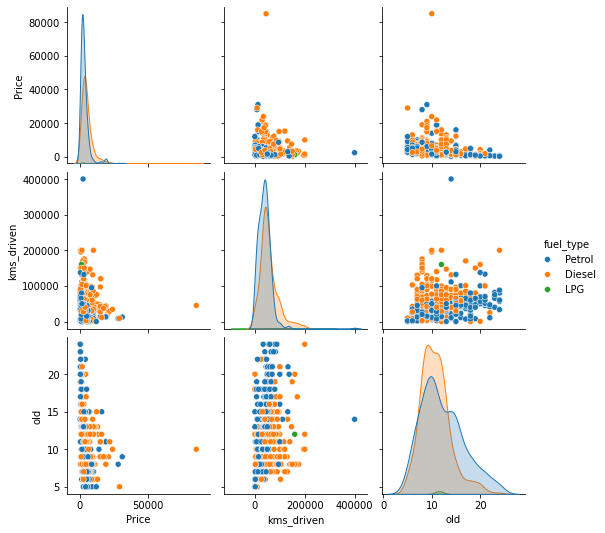

In [17]:
import seaborn as sns

sns.pairplot(df_analytics,hue='fuel_type')

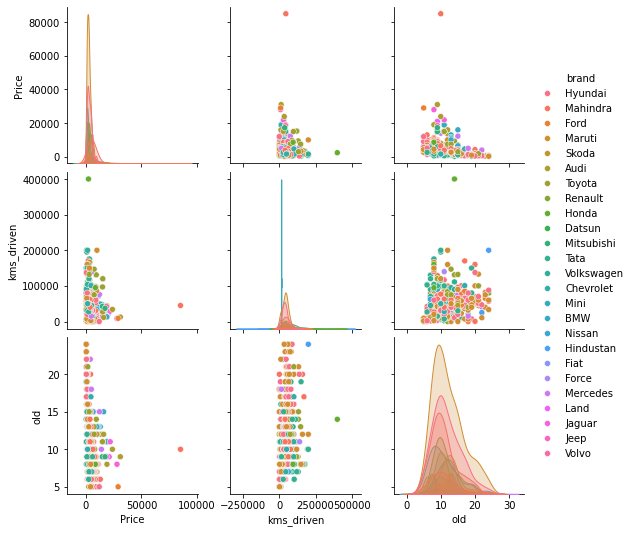

In [18]:
sns.pairplot(df_analytics,hue='brand')

In [19]:
df_analytics.corr(numeric_only=True)

,Price,kms_driven,old
Price,1.000000,-0.120318,-0.293379
kms_driven,-0.120318,1.000000,0.238496
old,-0.293379,0.238496,1.000000


In [20]:
# dummies = pd.get_dummies(df[['fuel_type', 'brand']], drop_first=True)
# df = pd.concat([df, dummies], axis=1).drop(['fuel_type', 'brand'], axis=1)
# df

In [21]:
#X = df.drop(columns=['name','year']) #dummies
X = df.drop(columns=['name','year','fuel_type','brand']) #dummies
y = df['Price']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=667,
                                                    )

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'R2: {r2}')
print(f'RMSE: {rmse:.2f}')

R2: 1.0
RMSE: 0.00


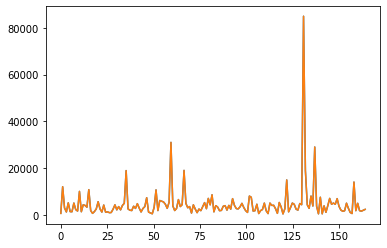

In [26]:
import matplotlib.pyplot as plt

lenght = len(y_test)
x = np.linspace(0,lenght,lenght)
plt.plot(x,y_pred,label='predicted')
plt.plot(x,y_test,label='true')

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X,y,cv=5,scoring='r2')

array([1., 1., 1., 1., 1.])